In [226]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from src.mlp import MLP, Layer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [227]:
df_training = pd.read_csv("data/mio1/regression/square-simple-training.csv", index_col=0)
df_test = pd.read_csv("data/mio1/regression/square-simple-test.csv", index_col=0)

In [228]:
x_train = df_training['x'].values.reshape(1, 100)
y_train = df_training['y'].values.reshape(1, 100)

In [229]:
y_max = np.max(y_train)
y_min = np.min(y_train)
y_train_normalised = (y_train - y_min) / (y_max - y_min)

In [ ]:
model = MLP(layers=[
    Layer(1, 5, activation="sigmoid"),
    Layer(5, 5, activation="sigmoid"),
    Layer(5, 1, activation="linear")
])
loss = model.fit(x_train, y_train_normalised, learning_rate=0.01, epochs=1e5, verbose=1, batch_size=10)

<Axes: >

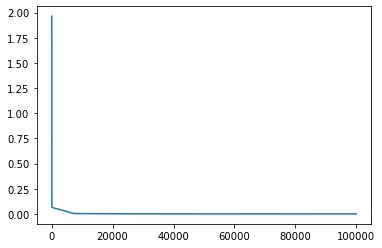

In [231]:
sns.lineplot(loss[0:])

In [232]:
y_predicted_normalised = model.predict(x_train)
y_predicted = y_predicted_normalised * (y_max - y_min) + y_min
print(mean_squared_error(y_train, y_predicted))
print(mean_squared_error(y_train_normalised, y_predicted_normalised))

1.7659458844725713
1.5397110910965242e-05


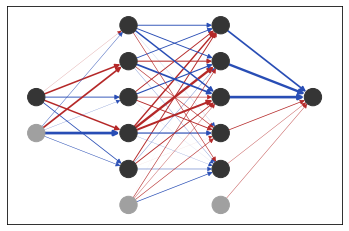

In [233]:
model.plot(log_weights=False)

<Axes: >

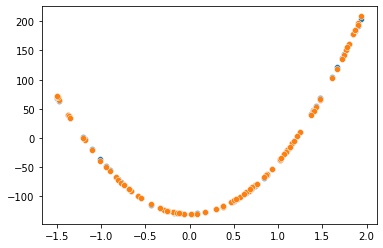

In [234]:
sns.scatterplot(x=x_train.reshape(100),y=y_predicted.reshape(100))
sns.scatterplot(x=x_train.reshape(100),y=y_train.reshape(100))